##**Random Forest Regressor**

In [1]:
#load data
import pandas as pd
df=pd.read_csv('Campaign_data_statistics_section_1.csv')
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [2]:
df.shape

(1888, 22)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [4]:
df.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,...,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,...,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,...,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,...,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,...,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


In [5]:
df.duplicated().sum()

0

In [6]:
df.corr()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
campaign_id,1.000000,0.443314,-0.052252,0.200128,0.028225,0.036410,0.051932,0.289416,0.209435,0.117558,...,-0.022799,0.219755,-0.006662,NaN,-0.128840,-0.002232,-0.041955,-0.058105,-0.104905,0.053315
sender,0.443314,1.000000,-0.102559,0.197929,0.056891,-0.046928,-0.059499,0.188444,0.070689,0.100454,...,-0.093244,0.147959,0.020928,NaN,-0.105279,-0.046900,0.024099,-0.071096,-0.132554,-0.031398
subject_len,-0.052252,-0.102559,1.000000,0.427326,-0.224770,-0.033574,-0.056666,0.012601,-0.007108,0.400213,...,-0.002214,-0.293446,0.120273,NaN,0.080303,0.125134,0.033410,0.100584,-0.021855,-0.180143
body_len,0.200128,0.197929,0.427326,1.000000,-0.496146,-0.089146,-0.079255,0.026781,-0.027747,0.559353,...,-0.021254,-0.220696,0.184035,NaN,-0.043931,0.051123,0.022431,0.023734,-0.075754,-0.247866
mean_paragraph_len,0.028225,0.056891,-0.224770,-0.496146,1.000000,0.003221,-0.012964,0.037475,-0.054066,-0.170012,...,-0.091250,0.162480,-0.096086,NaN,-0.043173,-0.032096,0.006765,-0.037435,-0.110896,0.178042
day_of_week,0.036410,-0.046928,-0.033574,-0.089146,0.003221,1.000000,0.720599,-0.058760,0.000249,-0.037789,...,0.019365,-0.069705,-0.032476,NaN,-0.013571,-0.037122,-0.013822,0.012735,0.081693,0.086372
is_weekend,0.051932,-0.059499,-0.056666,-0.079255,-0.012964,0.720599,1.000000,-0.063763,-0.015759,-0.033464,...,0.036626,-0.065130,-0.033968,NaN,-0.007504,-0.033757,-0.036255,-0.009789,0.046638,0.114138
category,0.289416,0.188444,0.012601,0.026781,0.037475,-0.058760,-0.063763,1.000000,0.007144,-0.023931,...,-0.028794,0.132441,-0.101411,NaN,0.100071,0.166200,0.068450,0.189839,-0.026602,-0.167756
product,0.209435,0.070689,-0.007108,-0.027747,-0.054066,0.000249,-0.015759,0.007144,1.000000,0.027486,...,0.027952,0.047566,-0.104653,NaN,0.013122,-0.018291,-0.060512,-0.110753,0.058073,0.121602
no_of_CTA,0.117558,0.100454,0.400213,0.559353,-0.170012,-0.037789,-0.033464,-0.023931,0.027486,1.000000,...,-0.005971,-0.145453,0.092320,NaN,-0.037244,0.041797,-0.015229,-0.015649,-0.007979,-0.172637


In [7]:
#check unique values in times_of_day column
df['times_of_day'].unique()


array(['Noon', 'Morning', 'Evening'], dtype=object)

In [8]:
# Apply one hot encoding to times_of_day column
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
df['times_of_day']=en.fit_transform(df['times_of_day'])
df['times_of_day'].head()

0    2
1    1
2    2
3    0
4    2
Name: times_of_day, dtype: int32

**Normality check**

In [9]:
for i in df.columns:
  skewness=df[i].skew()
  print('skewness of {}'.format(i),skewness)


skewness of campaign_id 0.0
skewness of sender 2.174657311277134
skewness of subject_len 1.6444141380155248
skewness of body_len 1.138933085765245
skewness of mean_paragraph_len 4.304716100688036
skewness of day_of_week 0.07023790854840975
skewness of is_weekend 1.5036799328435533
skewness of times_of_day 1.03612623716463
skewness of category -0.49583748313861375
skewness of product 0.6085700776600269
skewness of no_of_CTA 4.4812107635351195
skewness of mean_CTA_len 2.88693138718808
skewness of is_image 0.7959974178833346
skewness of is_personalised 3.837751602821495
skewness of is_quote 1.6055511994856593
skewness of is_timer 0
skewness of is_emoticons 3.7579214167191908
skewness of is_discount 4.716995859519346
skewness of is_price 17.284146405974955
skewness of is_urgency 2.457997267600203
skewness of target_audience -1.885738722020271
skewness of click_rate 4.317743085163305


**Distribution of data in each column**

C:\Users\mutho\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


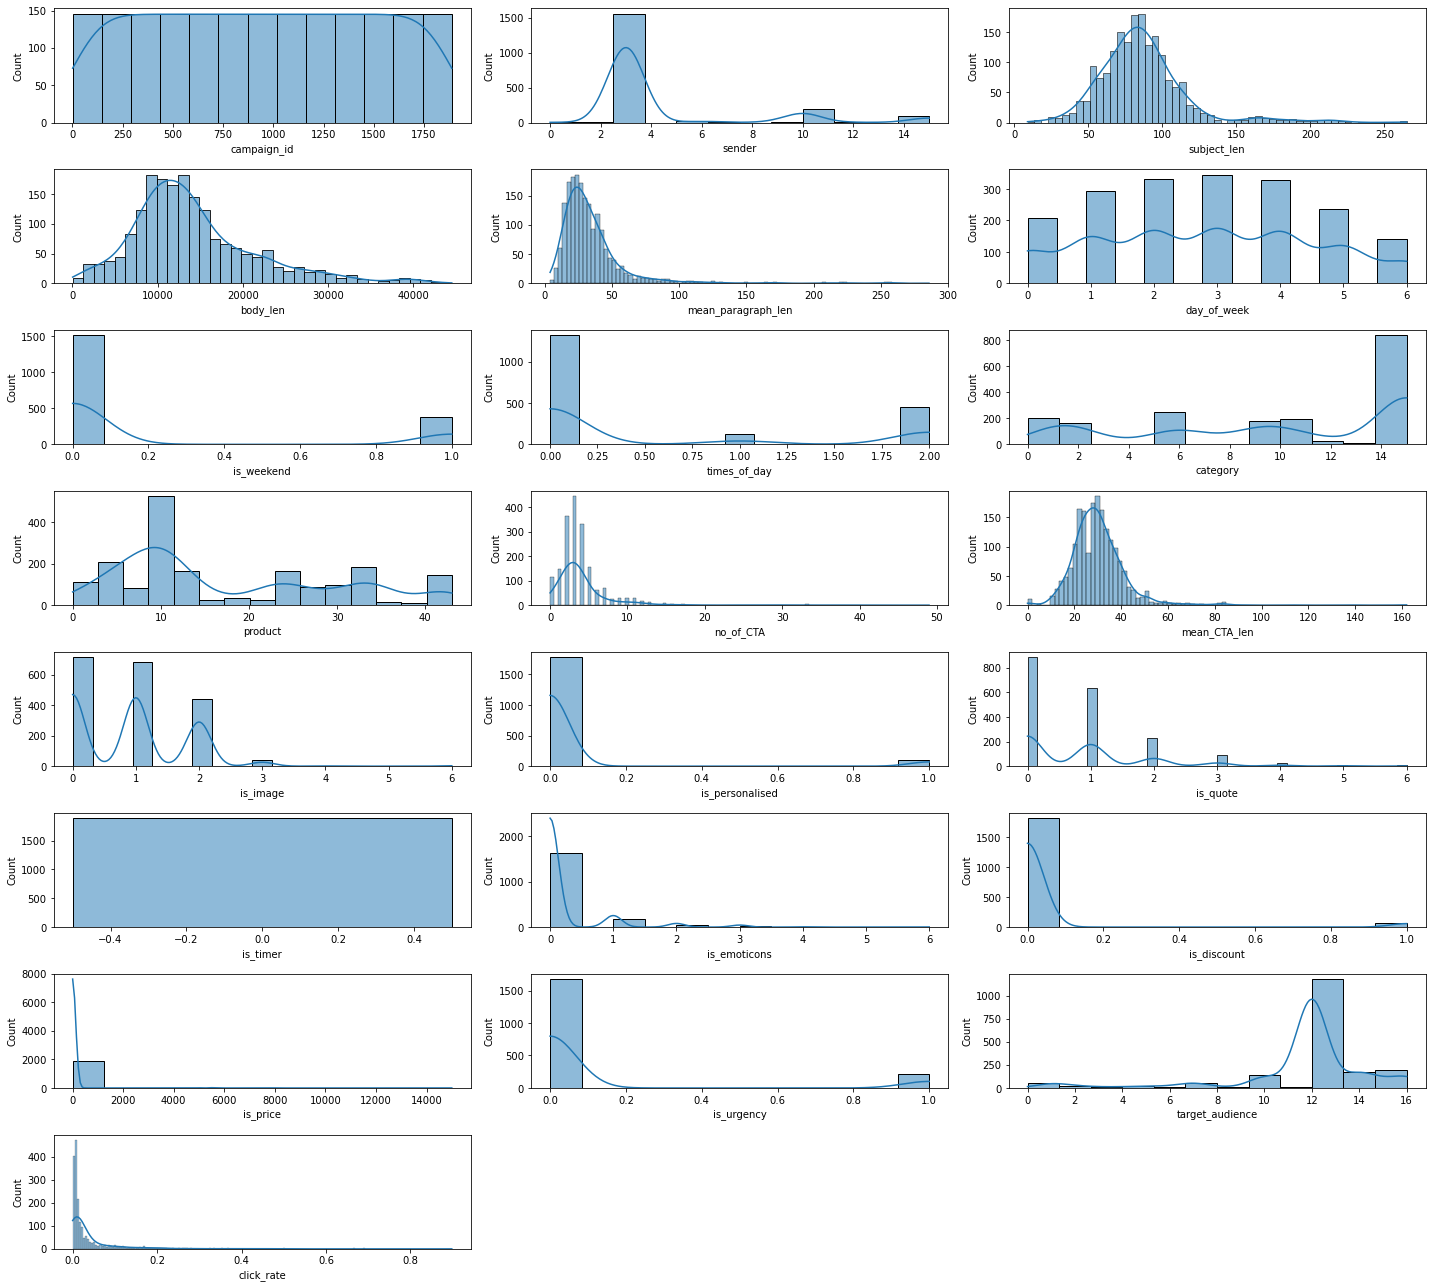

In [10]:
#check distribution of data in each column
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,18))
plot_num=1
for i in df:
  plt.subplot(8,3,plot_num)
  sns.histplot(x=df[i],data=df,kde=True)
  plt.xlabel(i)
  plot_num+=1
plt.tight_layout()
plt.show()

**check for Outliers visually**

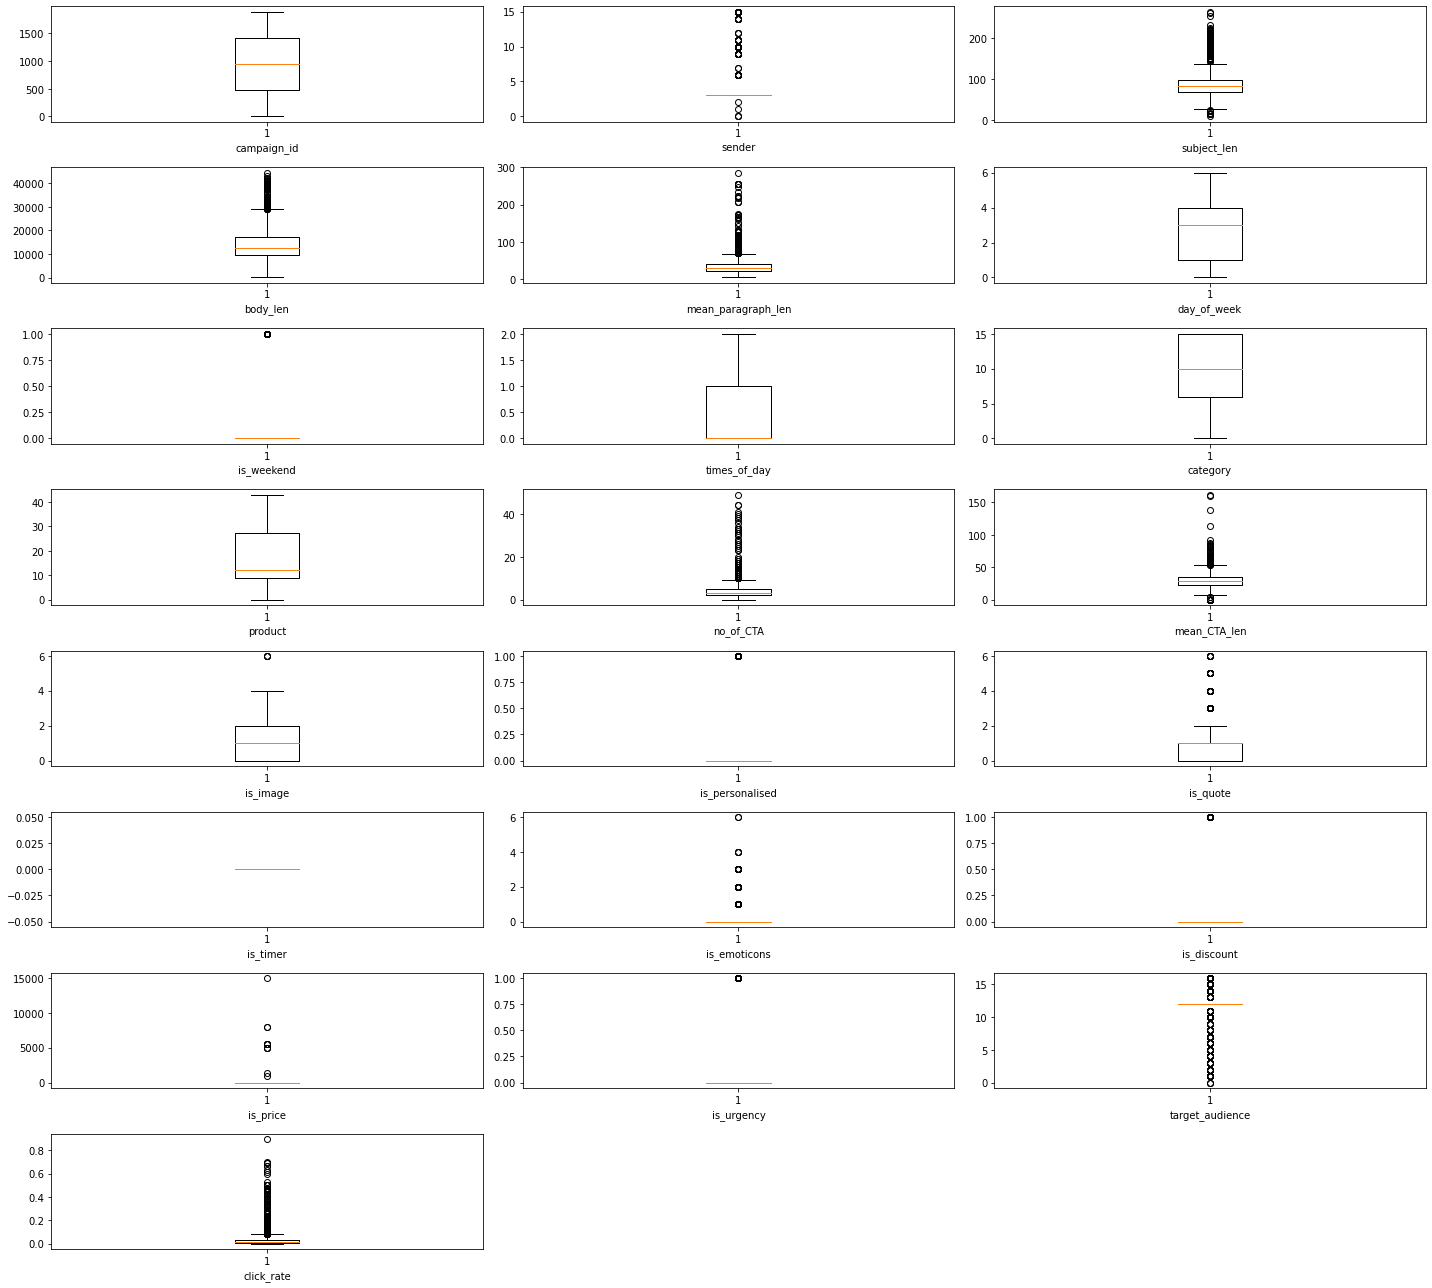

In [11]:
#check outliers in each column
plt.figure(figsize=(20,18))
plot_num=1
for i in df:
  plt.subplot(8,3,plot_num)
  plt.boxplot(df[i])
  plt.xlabel(i)
  plot_num+=1
plt.tight_layout()
plt.show()

In [12]:
#remove outliers and collect filtered data
for col in df:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  IQR=q3-q1
  upper_bound=q3+1.5*IQR
  lower_bound=q1-1.5*IQR
  data_filtered=df[(df[col]>lower_bound) & (df[col]<upper_bound)]


In [13]:
data_filtered

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
2,3,3,59,12801,16,5,1,2,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,0,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
8,9,3,89,10055,14,4,0,2,6,26,...,1,0,0,0,0,0,0,0,13,0.029233
9,10,3,89,11049,26,3,0,0,15,9,...,0,0,0,0,0,0,0,0,6,0.003058
12,13,3,82,9587,33,2,0,0,15,9,...,1,0,0,0,0,0,0,0,15,0.006463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,1883,3,74,10535,40,3,0,0,2,11,...,0,0,0,0,0,0,0,0,15,0.002748
1884,1885,3,58,10537,40,2,0,0,2,11,...,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,0,15,9,...,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,0,2,11,...,0,0,0,0,0,0,0,0,16,0.012014


In [14]:
#Identify Target variable
y=data_filtered['click_rate']
y.head()

2     0.002769
3     0.010868
8     0.029233
9     0.003058
12    0.006463
Name: click_rate, dtype: float64

In [15]:
#feature variables
x=data_filtered.drop('click_rate',axis=1)
x.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
2,3,3,59,12801,16,5,1,2,2,11,...,23,1,0,1,0,0,0,0,0,16
3,4,3,74,11037,30,4,0,0,15,9,...,24,0,0,0,0,0,0,0,0,10
8,9,3,89,10055,14,4,0,2,6,26,...,34,1,0,0,0,0,0,0,0,13
9,10,3,89,11049,26,3,0,0,15,9,...,28,0,0,0,0,0,0,0,0,6
12,13,3,82,9587,33,2,0,0,15,9,...,27,1,0,0,0,0,0,0,0,15


**Feature selection**

In [16]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
sfm=SelectFromModel(RandomForestRegressor()).fit(x,y)

In [17]:
X=sfm.get_feature_names_out()
X

array(['campaign_id', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'product', 'mean_CTA_len', 'target_audience'],
      dtype=object)

In [18]:
data_filtered.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [19]:
X=data_filtered.drop(['sender','is_weekend','times_of_day',
       'category','no_of_CTA','is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency','click_rate' ],axis=1)
X.head()

,campaign_id,subject_len,body_len,mean_paragraph_len,day_of_week,product,mean_CTA_len,target_audience
2,3,59,12801,16,5,11,23,16
3,4,74,11037,30,4,9,24,10
8,9,89,10055,14,4,26,34,13
9,10,89,11049,26,3,9,28,6
12,13,82,9587,33,2,9,27,15


**Train_Test_split**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


**standardization**

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_sc= sc.transform(X_train)
X_test_sc= sc.transform(X_test)

**Model Selection**

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()
rfg.fit(X_train_sc,y_train)


RandomForestRegressor()

**Model Evaluation**

In [23]:
y_pred=rfg.predict(X_test_sc)
y_pred[:5]

array([0.0036065 , 0.0071269 , 0.02944694, 0.01096312, 0.03524016])

In [24]:
rfg.score(X_train_sc,y_train)

0.8862442150168136

In [25]:
rfg.score(X_test_sc,y_test)

0.32996869741837265

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.00018759367504509142
R-squared (R2): 0.32996869741837265


**Hyperparameter Tuning**

In [27]:
paras = {
    'n_estimators':[5,10,20,50,100],
    'criterion':['squared_error','absolute_error', 'poisson'],
    'max_depth': [None,4,5,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [28]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(), paras)

In [29]:
grid_search.fit(X_train_sc,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [None, 4, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 20, 50, 100]})

In [30]:
grid_search.best_params_

{'criterion': 'poisson',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [31]:
gscv=RandomForestRegressor(criterion= 'poisson',max_depth=None,min_samples_leaf=4,min_samples_split= 2,n_estimators=100)
gscv.fit(X_train_sc,y_train)

RandomForestRegressor(criterion='poisson', min_samples_leaf=4)

**model evaluation after tuning**

In [32]:
y_pred_gscv=gscv.predict(X_test_sc)
y_pred_gscv[:5]

array([0.00396544, 0.006517  , 0.03407097, 0.01130742, 0.03598473])

In [33]:
gscv.score(X_train_sc,y_train)

0.6728865786715745

In [34]:
gscv.score(X_test_sc,y_test)

0.3272656090292966

In [35]:
r2 = r2_score(y_test, y_pred_gscv)
r2

0.3272656090292966


R-squared value increased from 0.32519 to 0.3530

In [36]:
import pickle

In [37]:
filename='final_model.pickle'
pickle.dump(gscv,open(filename,'wb'))

In [38]:
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(X_test_sc)
a

array([0.00396544, 0.006517  , 0.03407097, 0.01130742, 0.03598473,
       0.01943496, 0.02703794, 0.00702996, 0.01045357, 0.00733805,
       0.02688469, 0.02229978, 0.00645211, 0.00476918, 0.01219189,
       0.01533909, 0.00946919, 0.04764563, 0.01466792, 0.01637174,
       0.00828449, 0.01277416, 0.04555743, 0.02322394, 0.0230363 ,
       0.02989712, 0.01432171, 0.01346969, 0.02226551, 0.02077692,
       0.01100953, 0.00809095, 0.009649  , 0.00634828, 0.00690827,
       0.01345463, 0.02377798, 0.02321716, 0.01465485, 0.03655786,
       0.00483654, 0.00478762, 0.01311902, 0.00707986, 0.03897483,
       0.02173847, 0.01620035, 0.02255085, 0.00669776, 0.00720358,
       0.00639127, 0.03740452, 0.02249755, 0.01133568, 0.03063899,
       0.007626  , 0.0072551 , 0.0140661 , 0.0114511 , 0.01648298,
       0.0119207 , 0.00699749, 0.01093087, 0.03221759, 0.00762634,
       0.00886082, 0.01593009, 0.01236651, 0.00563541, 0.02139238,
       0.00615868, 0.02401296, 0.00840971, 0.00681414, 0.01927